# **Set up**

*This* project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

**It** also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**And** TensorFlow ≥ 2.8:

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Regression MLPs (Multi-Layer Perceptron)

In [5]:
# Import necessary libraries and modules
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Create an MLPRegressor with 3 hidden layers, each containing 50 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create a StandardScaler for feature scaling
scaler = StandardScaler()

# Create a pipeline that first scales the features using StandardScaler
# and then applies the MLPRegressor
pipeline = make_pipeline(scaler, mlp_reg)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print(rmse)


0.5053326657968679


# Implementing MLPs with Keras


In [5]:
# Import necessary libraries and modules
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
# Load the California housing dataset
housing = fetch_california_housing()

## **Dataset Insights**

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## **Test, Train and Validation split**


In [9]:
# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [10]:
# Standardize the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

## **Build Model**

## **Early Stopping - CallBack**

In [11]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# **First Training**


*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = relu
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Random
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [12]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelrsr.h5", save_best_only=True)

## **SGD optimizer**

In [13]:
# Model with SGD optimizer
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [14]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [15]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


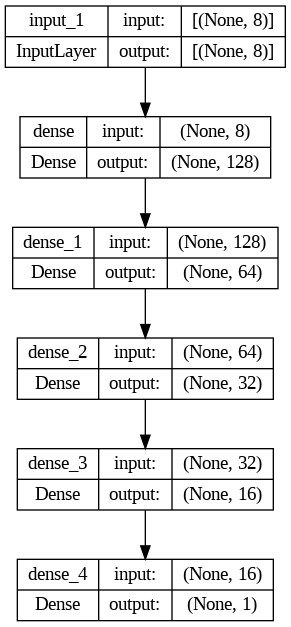

In [16]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [17]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5913 - mae: 0.5437 - val_loss: 3.0428 - val_mae: 0.4743
Epoch 2/50
 40/363 [==>...........................] - ETA: 0s - loss: 0.3945 - mae: 0.4574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 3s 7ms/step - loss: 0.4092 - mae: 0.4493 - val_loss: 0.6829 - val_mae: 0.4535
Epoch 3/50
363/363 [==============================] - 2s 7ms/step - loss: 0.3776 - mae: 0.4378 - val_loss: 0.4088 - val_mae: 0.4188
Epoch 4/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3553 - mae: 0.4201 - val_loss: 0.3353 - val_mae: 0.4022
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3428 - mae: 0.4121 - val_loss: 0.4463 - val_mae: 0.3976
Epoch 6/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3360 - mae: 0.4066 - val_loss: 0.4059 - val_mae: 0.3973
Epoch 7/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3277 - mae: 0.4006 - val_loss: 0.5544 - val_mae: 0.4154
Epoch 8/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3211 - mae: 0.3964 - val_loss: 0.7896 - val_mae: 0.3993
Epoch 9/50
363/363 [==============================] - 3s 8ms/step - loss: 0.3200 - mae:

In [18]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [19]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


### **Plotting the Training and Prediction insights**

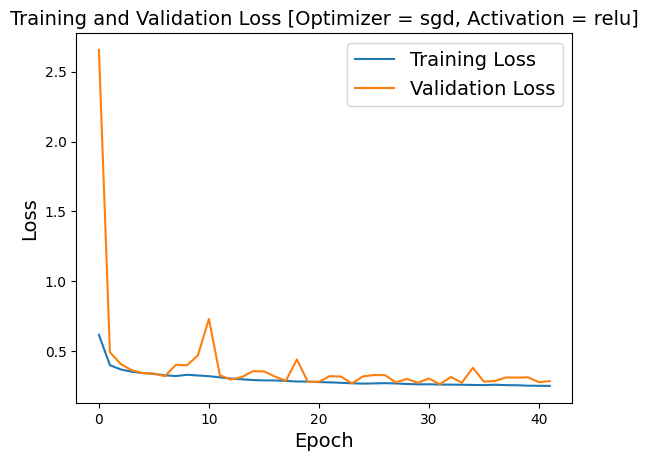

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = relu].png')

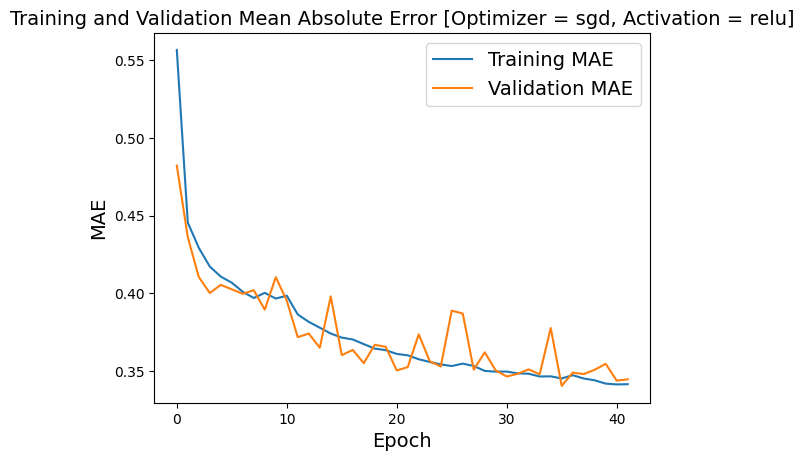

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = relu].png')

In [22]:
# Evaluate the model on the test set
mse = sgd_model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error on Test Set:", rmse)

162/162 [==============================] - 0s 1ms/step - loss: 0.2969 - mae: 0.3713
Root Mean Squared Error on Test Set: [0.54489073 0.60936911]


## **Model Checkpoint - CallBack**

In [23]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelrar.h5", save_best_only=True)

## **ADAM optimizer**

In [24]:
# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [25]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [26]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


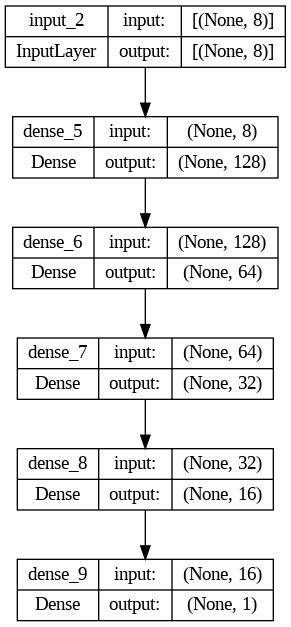

In [27]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [28]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 2ms/step - loss: 0.7339 - mae: 0.5754 - val_loss: 0.7219 - val_mae: 0.4448
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3809 - mae: 0.4282 - val_loss: 0.4674 - val_mae: 0.4222
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3478 - mae: 0.4131 - val_loss: 0.4345 - val_mae: 0.4051
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3364 - mae: 0.4061 - val_loss: 0.3643 - val_mae: 0.4020
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3248 - mae: 0.3972 - val_loss: 0.2936 - val_mae: 0.3695
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3104 - mae: 0.3851 - val_loss: 0.5491 - val_mae: 0.4044
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3015 - mae: 0.3801 - val_loss: 0.2785 - val_mae: 0.3629
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [29]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [30]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

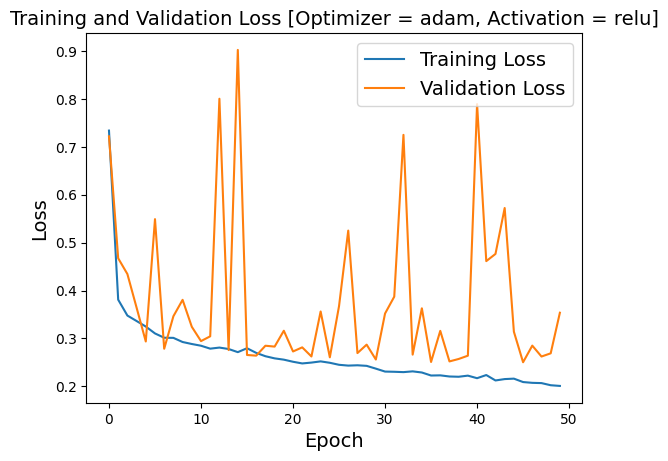

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu].png')

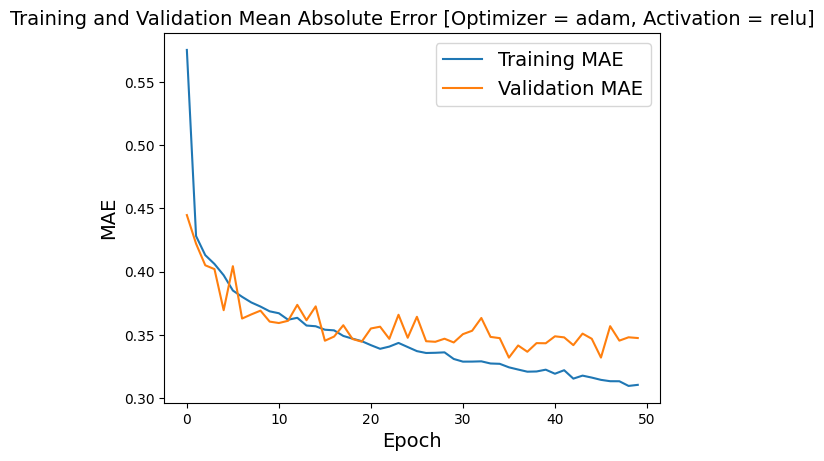

<Figure size 640x480 with 0 Axes>

In [32]:
# Plot training history
plt.plot(adam_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(adam_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = adam, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = adam, Activation = relu].png')

# Part 2
*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = **sigmoid**
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Random
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [33]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelssr.h5", save_best_only=True)

## **SGD optimizer**

In [34]:
# Model with SGD optimizer
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [35]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [36]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


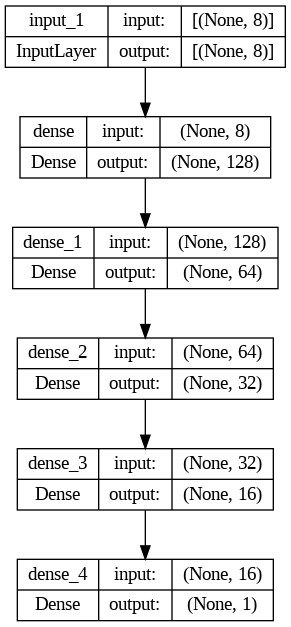

In [37]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [38]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3518 - mae: 0.9176 - val_loss: 1.3129 - val_mae: 0.9002
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3408 - mae: 0.9175 - val_loss: 1.3104 - val_mae: 0.8971
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3376 - mae: 0.9165 - val_loss: 1.3102 - val_mae: 0.8871
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3339 - mae: 0.9152 - val_loss: 1.3066 - val_mae: 0.8867
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3318 - mae: 0.9141 - val_loss: 1.3024 - val_mae: 0.8852
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3271 - mae: 0.9121 - val_loss: 1.3075 - val_mae: 0.9168
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3181 - mae: 0.9103 - val_loss: 1.2942 - val_mae: 0.9083
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 1.

In [39]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [40]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

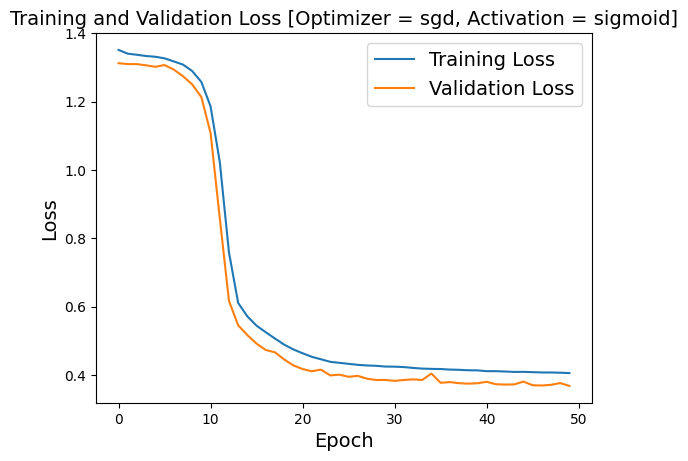

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid].png')

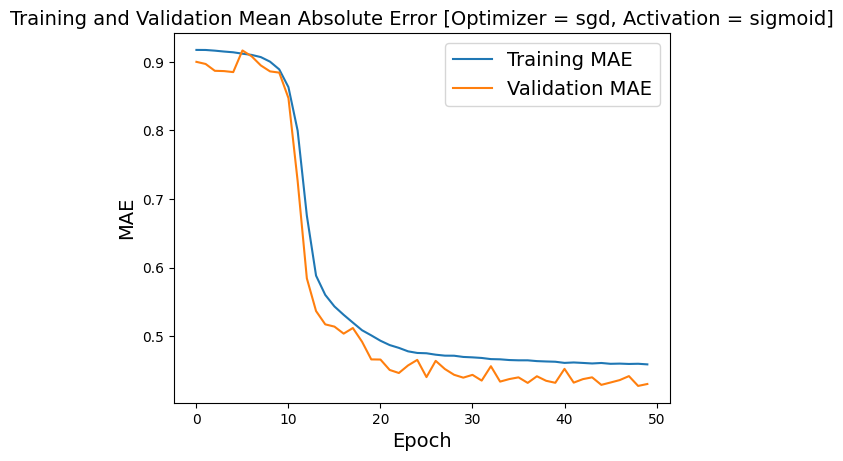

<Figure size 640x480 with 0 Axes>

In [42]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = sigmoid]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = relu].png')

## **Model Checkpoint - CallBack**

In [43]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelsar.h5", save_best_only=True)

## **ADAM optimizer**

In [44]:
# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [45]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [46]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


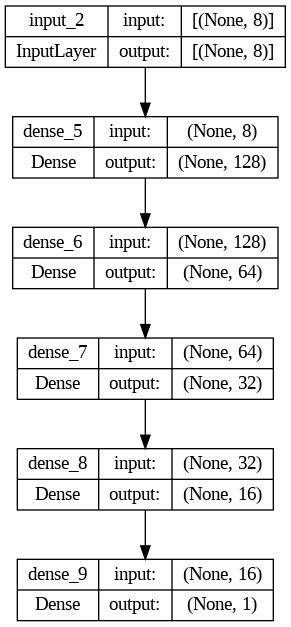

In [47]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [48]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 2ms/step - loss: 0.9280 - mae: 0.7299 - val_loss: 0.4388 - val_mae: 0.4865
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4307 - mae: 0.4883 - val_loss: 0.3805 - val_mae: 0.4497
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4118 - mae: 0.4719 - val_loss: 0.3711 - val_mae: 0.4420
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4053 - mae: 0.4647 - val_loss: 0.3809 - val_mae: 0.4618
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - mae: 0.4607 - val_loss: 0.3634 - val_mae: 0.4377
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4022 - mae: 0.4595 - val_loss: 0.3644 - val_mae: 0.4288
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3999 - mae: 0.4576 - val_loss: 0.3642 - val_mae: 0.4422
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [49]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [50]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

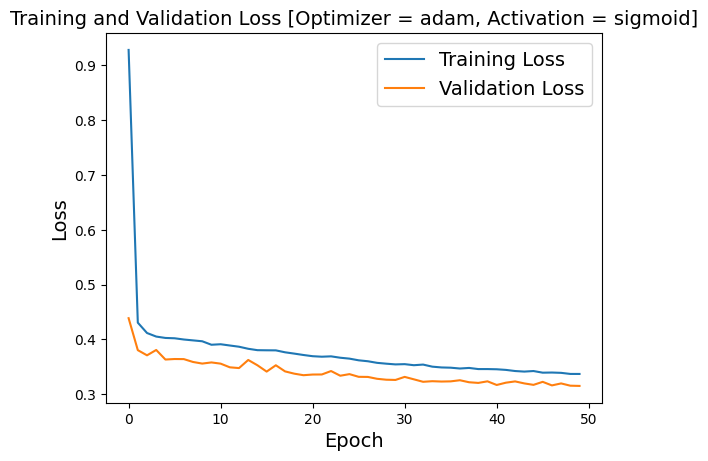

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = sigmoid]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu].png')

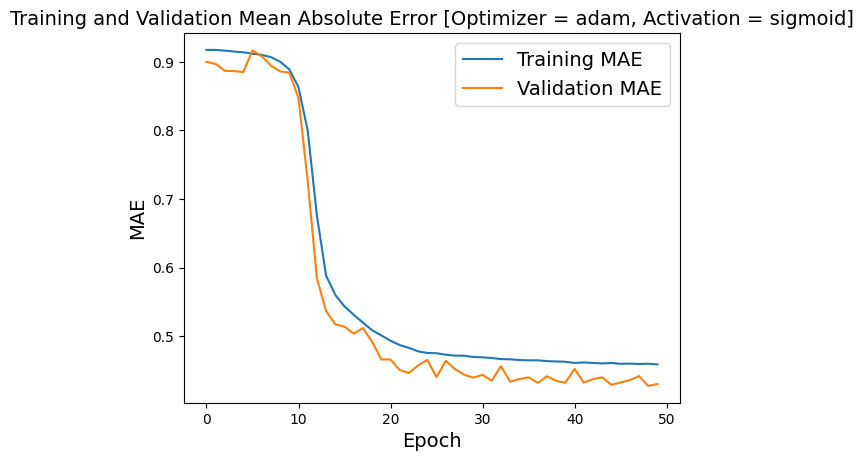

<Figure size 640x480 with 0 Axes>

In [52]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = adam, Activation = sigmoid]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = adam, Activation = sigmoid].png')

# **Second Training**


*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = relu
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Specific
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [53]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelrss.h5", save_best_only=True)

## **SGD optimizer**

In [54]:
# Model with SGD optimizer
custom_initializer = tf.keras.initializers.Constant(value=0.01)
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu',  kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu',  kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [55]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [56]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


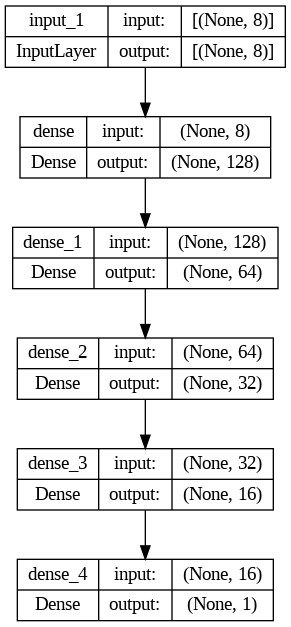

In [57]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [58]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.2417 - mae: 0.8543 - val_loss: 0.6330 - val_mae: 0.6085
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5502 - mae: 0.5536 - val_loss: 0.4245 - val_mae: 0.4733
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4511 - mae: 0.4886 - val_loss: 0.4027 - val_mae: 0.4572
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4411 - mae: 0.4831 - val_loss: 0.4134 - val_mae: 0.4616
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4439 - mae: 0.4848 - val_loss: 0.3970 - val_mae: 0.4573
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4410 - mae: 0.4835 - val_loss: 0.4080 - val_mae: 0.4587
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4387 - mae: 0.4840 - val_loss: 0.3971 - val_mae: 0.4637
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [59]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [60]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

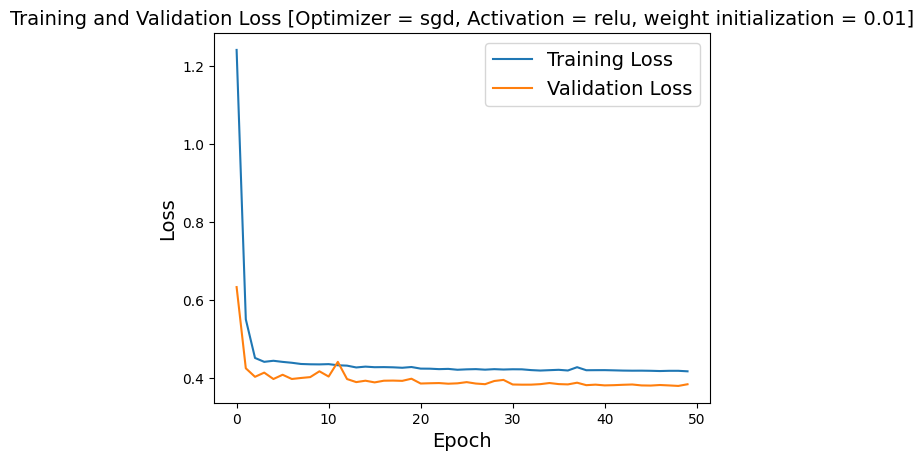

<Figure size 640x480 with 0 Axes>

In [61]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = relu, weight initialization = 0.01].png')

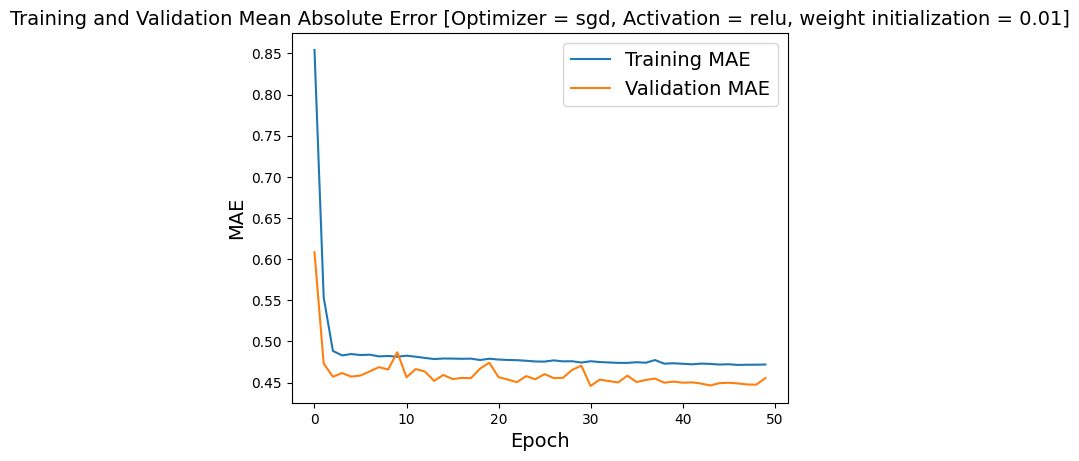

<Figure size 640x480 with 0 Axes>

In [62]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = relu, weight initialization = 0.01].png')

## **Model Checkpoint - CallBack**

In [63]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelras.h5", save_best_only=True)

## **ADAM optimizer**

In [64]:
custom_initializer = tf.keras.initializers.Constant(value=0.01)
# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu', kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu', kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [65]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [66]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


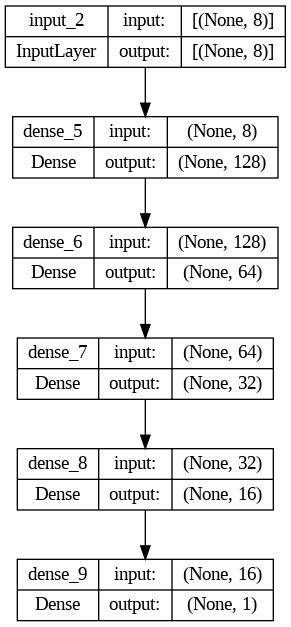

In [67]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [68]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 2ms/step - loss: 0.7870 - mae: 0.6140 - val_loss: 0.4516 - val_mae: 0.5034
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4634 - mae: 0.4946 - val_loss: 0.4209 - val_mae: 0.4800
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4628 - mae: 0.4965 - val_loss: 0.4151 - val_mae: 0.4722
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4708 - mae: 0.4991 - val_loss: 0.4246 - val_mae: 0.4734
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4648 - mae: 0.4935 - val_loss: 0.4150 - val_mae: 0.4798
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4609 - mae: 0.4959 - val_loss: 0.4084 - val_mae: 0.4594
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4758 - mae: 0.4970 - val_loss: 0.4128 - val_mae: 0.4749
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [69]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [70]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


### **Plotting the Training and Prediction insights**

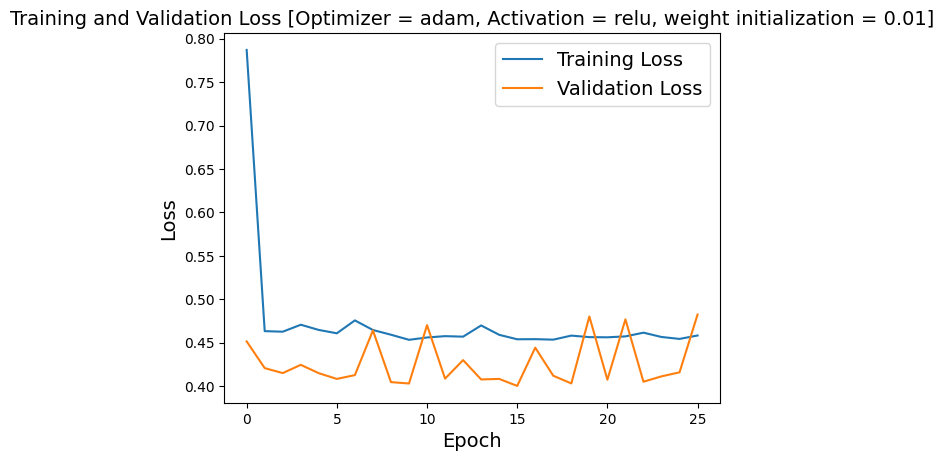

<Figure size 640x480 with 0 Axes>

In [71]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu, weight initialization = 0.01].png')

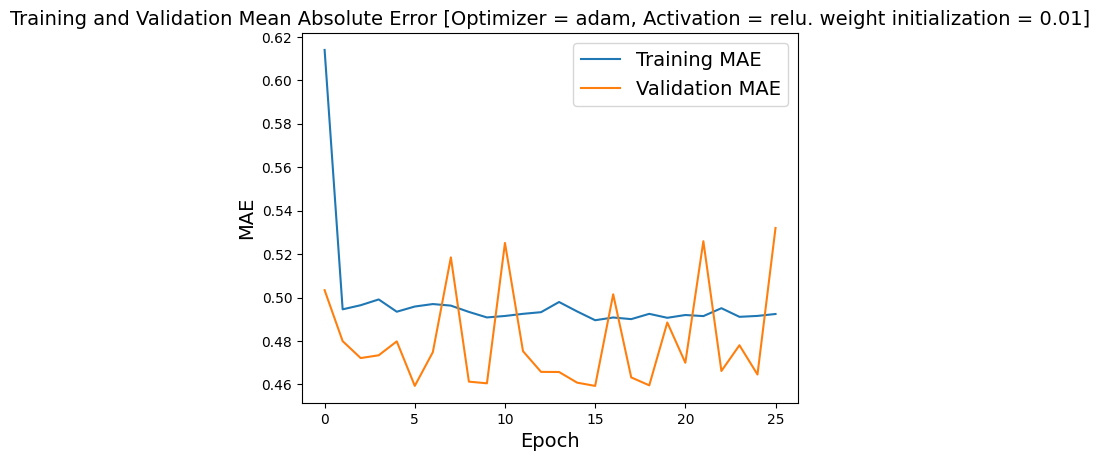

<Figure size 640x480 with 0 Axes>

In [72]:
# Plot training history
plt.plot(adam_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(adam_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = adam, Activation = relu. weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = adam, Activation = relu, weight initialization = 0.001].png')

# Part 2
*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = **sigmoid**
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Specific
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [73]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelsss.h5", save_best_only=True)

## **SGD optimizer**

In [74]:
custom_initializer = tf.keras.initializers.Constant(value=0.01)

# Model with SGD optimizer
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid',  kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid',  kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid',  kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid',  kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [75]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [76]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


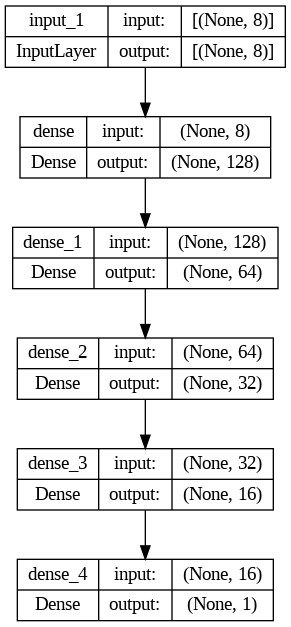

In [77]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [78]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.4093 - mae: 0.9317 - val_loss: 1.3205 - val_mae: 0.8853
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3433 - mae: 0.9173 - val_loss: 1.3151 - val_mae: 0.8948
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3436 - mae: 0.9175 - val_loss: 1.3211 - val_mae: 0.9149
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3441 - mae: 0.9184 - val_loss: 1.3175 - val_mae: 0.8889
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3426 - mae: 0.9172 - val_loss: 1.3289 - val_mae: 0.9246
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3433 - mae: 0.9188 - val_loss: 1.3163 - val_mae: 0.8910
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3441 - mae: 0.9185 - val_loss: 1.3149 - val_mae: 0.9010
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 1.

In [79]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [80]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


### **Plotting the Training and Prediction insights**

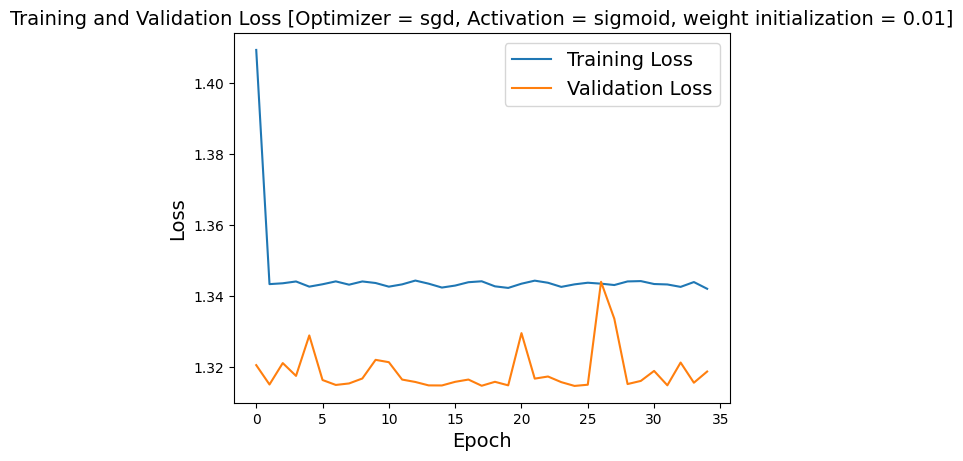

<Figure size 640x480 with 0 Axes>

In [81]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid].png, weight initialization = 0.01].png')

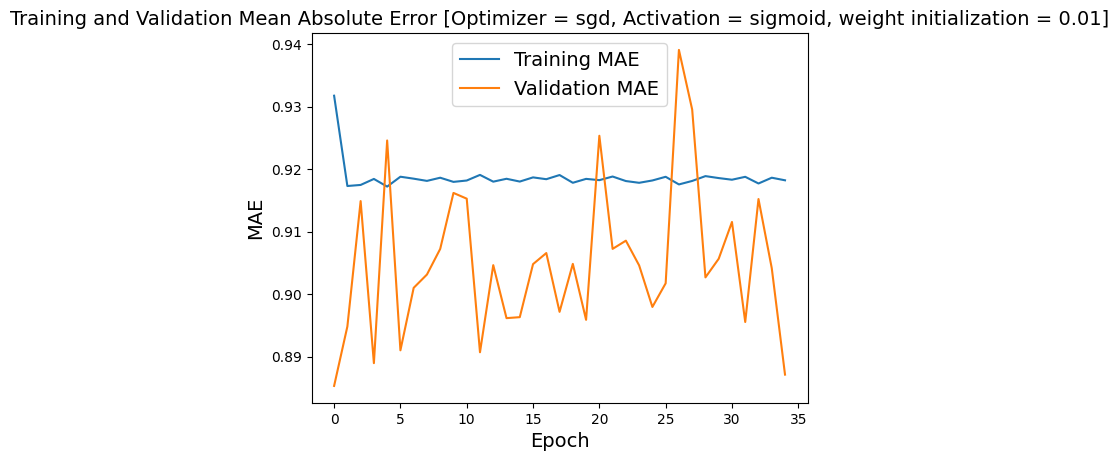

<Figure size 640x480 with 0 Axes>

In [82]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = sigmoid, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = sigmoid, weight initialization = 0.01].png')

## **Model Checkpoint - CallBack**

In [83]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelsas.h5", save_best_only=True)

## **ADAM optimizer**

In [84]:
custom_initializer = tf.keras.initializers.Constant(value=0.01)

# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid', kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid', kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [85]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [86]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


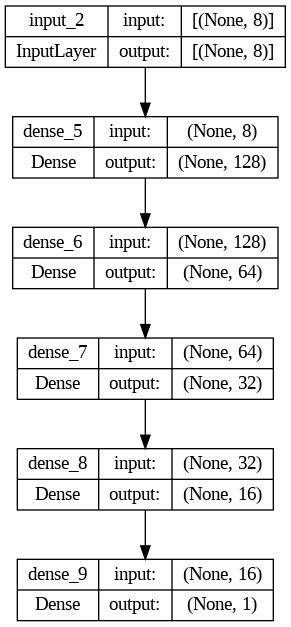

In [87]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [88]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 2.6605 - mae: 1.1893 - val_loss: 1.3147 - val_mae: 0.8957
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3405 - mae: 0.9145 - val_loss: 1.3168 - val_mae: 0.9081
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3396 - mae: 0.9176 - val_loss: 1.3121 - val_mae: 0.9037
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3092 - mae: 0.9014 - val_loss: 1.2290 - val_mae: 0.8700
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 1.1582 - mae: 0.8363 - val_loss: 1.0093 - val_mae: 0.7781
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.8832 - mae: 0.7121 - val_loss: 0.7310 - val_mae: 0.6563
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6491 - mae: 0.6044 - val_loss: 0.5529 - val_mae: 0.5594
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [89]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [90]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

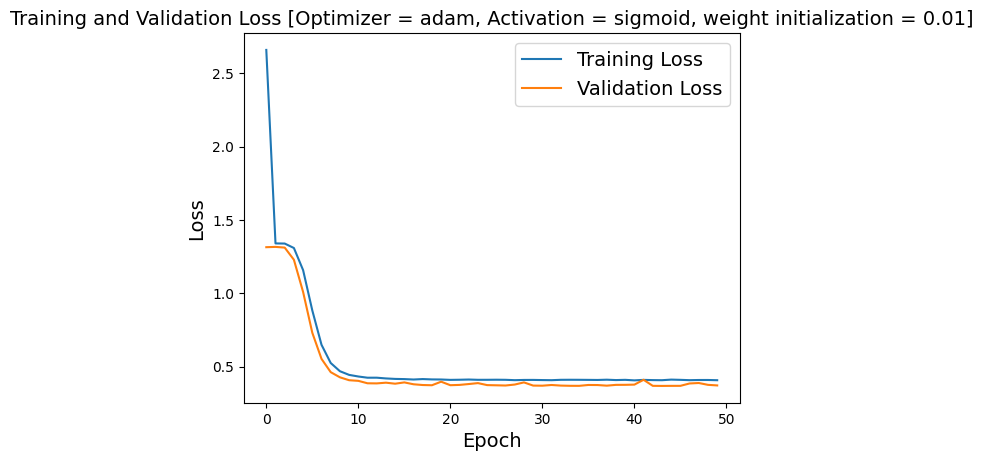

<Figure size 640x480 with 0 Axes>

In [91]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = sigmoid, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu, weight initialization = 0.01].png')

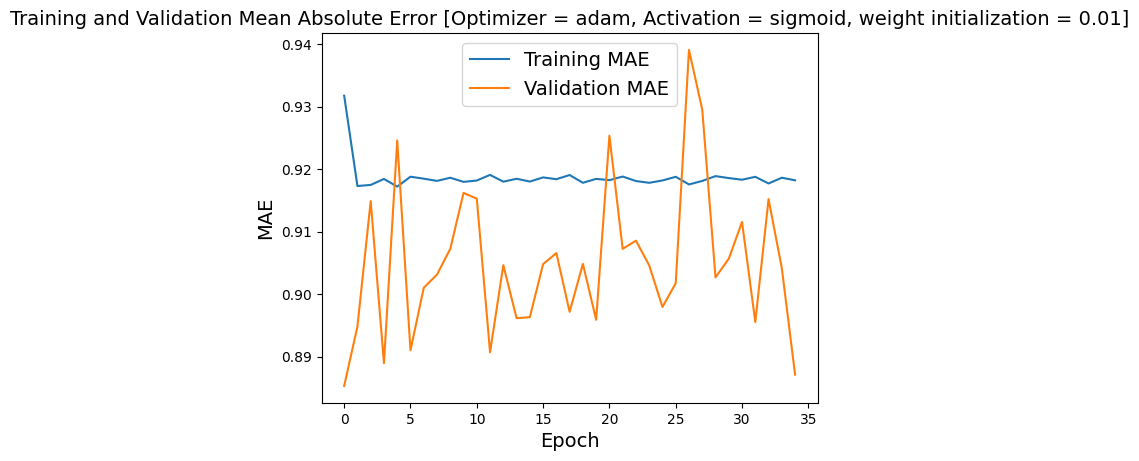

<Figure size 640x480 with 0 Axes>

In [92]:
    # Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = adam, Activation = sigmoid, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('a.png')